In [2]:
from heapq import merge

import pandas as pd
import numpy as np
from preprocess import preprocess_MIMIC
import matplotlib.pyplot as plt
from statistics import mean

In [50]:
demographics = pd.read_csv('data/demographics.csv')
demographics.head(10)

,subject_id,insurance,language,marital_status,ethnicity,gender,anchor_age
0,12427812,Other,ENGLISH,NaN,UNKNOWN,F,35
1,14029832,Other,ENGLISH,NaN,OTHER,F,55
2,14495017,Other,?,NaN,WHITE,M,0
3,13676048,Other,?,MARRIED,WHITE,F,33
4,13831972,Medicaid,ENGLISH,SINGLE,WHITE,F,46
5,18523038,Other,ENGLISH,SINGLE,WHITE,F,63
6,16705931,Other,ENGLISH,MARRIED,WHITE,F,64
7,19963742,Other,ENGLISH,SINGLE,UNKNOWN,F,73
8,10903424,Other,ENGLISH,SINGLE,WHITE,F,23
9,15030422,Other,ENGLISH,SINGLE,WHITE,F,57


In [51]:
#Getting the dcm paths
record_list = pd.read_csv('data/mimic-cxr/2.0.0/cxr-record-list.csv')
display(record_list.head(10))

,subject_id,study_id,dicom_id,path
0,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,10000032,50414267,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
2,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
3,10000032,53189527,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,files/p10/p10000032/s53189527/e084de3b-be89b11...
4,10000032,53911762,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...
5,10000032,53911762,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,files/p10/p10000032/s53911762/fffabebf-74fd3a1...
6,10000032,56699142,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,files/p10/p10000032/s56699142/ea030e7a-2e3b134...
7,10000764,57375967,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,files/p10/p10000764/s57375967/096052b7-d256dc4...
8,10000764,57375967,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,files/p10/p10000764/s57375967/b79e55c3-735ce5a...
9,10000764,57375967,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,files/p10/p10000764/s57375967/dcfeeac4-1597e31...


In [59]:
merged_df = pd.merge(demographics, record_list, how='left', on="subject_id")
display(merged_df.head(10))
display(merged_df.shape)

,subject_id,insurance,language,marital_status,ethnicity,gender,anchor_age,study_id,dicom_id,path
0,12427812,Other,ENGLISH,NaN,UNKNOWN,F,35,NaN,NaN,NaN
1,14029832,Other,ENGLISH,NaN,OTHER,F,55,NaN,NaN,NaN
2,14495017,Other,?,NaN,WHITE,M,0,NaN,NaN,NaN
3,13676048,Other,?,MARRIED,WHITE,F,33,NaN,NaN,NaN
4,13831972,Medicaid,ENGLISH,SINGLE,WHITE,F,46,50752230.0,a31a6829-31bbf05e-7080adf3-d5cebff8-07d55c98,files/p13/p13831972/s50752230/a31a6829-31bbf05...
5,13831972,Medicaid,ENGLISH,SINGLE,WHITE,F,46,50752230.0,a46573ed-ff38117c-2465e148-1755e50b-c42c69d6,files/p13/p13831972/s50752230/a46573ed-ff38117...
6,13831972,Medicaid,ENGLISH,SINGLE,WHITE,F,46,50752230.0,d89b61fb-2fb528c3-1973b057-5da888df-c68c15dd,files/p13/p13831972/s50752230/d89b61fb-2fb528c...
7,13831972,Medicaid,ENGLISH,SINGLE,WHITE,F,46,56446495.0,c4b44448-c0545116-3246a396-5b70dc51-f9643b4f,files/p13/p13831972/s56446495/c4b44448-c054511...
8,13831972,Medicaid,ENGLISH,SINGLE,WHITE,F,46,56446495.0,e3817a27-a9c2e3ad-ece4515a-1d80b8fb-5da09941,files/p13/p13831972/s56446495/e3817a27-a9c2e3a...
9,18523038,Other,ENGLISH,SINGLE,WHITE,F,63,NaN,NaN,NaN


(2949359, 10)

In [60]:
split_data = pd.read_csv('data/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-split.csv')
display(split_data.head(10))
display(split_data.shape)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
5,10000898,50771383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,10000898,54205396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,10000935,50578979,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,1.0,NaN,NaN
8,10000935,51178377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN,NaN
9,10000935,55697293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


(227827, 16)

,dicom_id,study_id,subject_id,split
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train
5,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,train
6,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,train
7,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,57375967,10000764,train
8,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,57375967,10000764,train
9,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,57375967,10000764,train


(377110, 4)

In [62]:
split = pd.merge(split_data, merged_df, how='left', on="dicom_id")
display(split.head(10))
display(split.shape)

,dicom_id,study_id_x,subject_id_x,split,subject_id_y,insurance,language,marital_status,ethnicity,gender,anchor_age,study_id_y,path
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,10000032.0,Other,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...
2,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...
3,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...
4,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
5,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,10000032.0,Other,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
6,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
7,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
8,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,53189527.0,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
9,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,10000032.0,Other,ENGLISH,WIDOWED,WHITE,F,52.0,53189527.0,files/p10/p10000032/s53189527/2a2277a9-b0ded15...


(2666533, 13)

In [67]:
#unique patients
distinct_count = split['dicom_id'].nunique(dropna=True)
display(distinct_count)

377110

In [68]:
split.drop_duplicates(subset='dicom_id', keep='first', inplace=True)
display(split.shape)
display(split.head(10))

(377110, 13)

,dicom_id,study_id_x,subject_id_x,split,subject_id_y,insurance,language,marital_status,ethnicity,gender,anchor_age,study_id_y,path
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...
4,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,50414267.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
8,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,53189527.0,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
12,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,53189527.0,files/p10/p10000032/s53189527/e084de3b-be89b11...
16,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,53911762.0,files/p10/p10000032/s53911762/68b5c4b1-227d048...
20,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,53911762.0,files/p10/p10000032/s53911762/fffabebf-74fd3a1...
24,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,train,10000032.0,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,56699142.0,files/p10/p10000032/s56699142/ea030e7a-2e3b134...
28,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,57375967,10000764,train,10000764.0,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,57375967.0,files/p10/p10000764/s57375967/096052b7-d256dc4...
29,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,57375967,10000764,train,10000764.0,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,57375967.0,files/p10/p10000764/s57375967/b79e55c3-735ce5a...
30,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,57375967,10000764,train,10000764.0,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,57375967.0,files/p10/p10000764/s57375967/dcfeeac4-1597e31...


In [91]:
label_data = pd.read_csv('data/mimic-cxr-jpg/2.0.0/mimic-cxr-2.0.0-negbio.csv')
display(label_data.head(10))
display(label_data.shape)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
5,10000898,50771383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,10000898,54205396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,10000935,50578979,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN
8,10000935,51178377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN,NaN
9,10000935,55697293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


(227827, 16)

In [79]:
#label_data.drop(['study_id', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'Pleural Other', 'Support Devices'], axis=1, inplace=True)
#No Finding,Atelectasis,Cardiomegaly,Effusion,Pneumonia,Pneumothorax,Consolidation,Edema
display(label_data.shape)
display(label_data.head(10))

(227827, 16)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
5,10000898,50771383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,10000898,54205396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,10000935,50578979,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN
8,10000935,51178377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN,NaN
9,10000935,55697293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [92]:
label_data.replace(-1.0, 0.0, inplace=True)  # Replace all -1.0 with 0.0
label_data.fillna(0.0, inplace=True)         # Replace all NaN with 0.0
display(label_data.shape)
display(label_data.head(10))

(227827, 16)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10000032,56699142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10000898,50771383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,10000898,54205396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,10000935,50578979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,10000935,51178377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10000935,55697293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [87]:
display(label_data.head(10))
display(label_data.shape)
display(split.head(10))
display(split.shape)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10000032,56699142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10000898,50771383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,10000898,54205396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,10000935,50578979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,10000935,51178377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10000935,55697293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(227827, 16)

,dicom_id,study_id,subject_id,split,insurance,language,marital_status,ethnicity,Sex,Age,path
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...
4,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...
8,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53189527/2a2277a9-b0ded15...
12,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53189527/e084de3b-be89b11...
16,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53911762/68b5c4b1-227d048...
20,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53911762/fffabebf-74fd3a1...
24,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s56699142/ea030e7a-2e3b134...
28,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,57375967,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/096052b7-d256dc4...
29,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,57375967,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/b79e55c3-735ce5a...
30,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,57375967,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/dcfeeac4-1597e31...


(377110, 11)

In [93]:
label_data.drop(['Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'Pleural Other', 'Support Devices'], axis=1, inplace=True)
display(label_data.shape)
display(label_data.head(10))

(227827, 10)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,No Finding,Pleural Effusion,Pneumonia,Pneumothorax
0,10000032,50414267,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10000032,53911762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10000032,56699142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,10000898,50771383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,10000898,54205396,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,10000935,50578979,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,10000935,51178377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10000935,55697293,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [94]:
proc = pd.merge(split, label_data, how='left', on=['subject_id', 'study_id'])
display(proc.head(10))
display(proc.shape)

,dicom_id,study_id,subject_id,split,insurance,language,marital_status,ethnicity,Sex,Age,path,Atelectasis,Cardiomegaly,Consolidation,Edema,No Finding,Pleural Effusion,Pneumonia,Pneumothorax
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53189527/e084de3b-be89b11...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53911762/68b5c4b1-227d048...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53911762/fffabebf-74fd3a1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s56699142/ea030e7a-2e3b134...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,57375967,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/096052b7-d256dc4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,b79e55c3-735ce5ac-64412506-cdc9ea79-f1af521f,57375967,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,dcfeeac4-1597e318-d0e6736a-8b2c2238-47ac3f1b,57375967,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(377110, 19)

In [95]:
proc.drop(['dicom_id', 'study_id'], axis=1, inplace=True)
display(proc.shape)
display(proc.head(10))

(377110, 17)

,subject_id,split,insurance,language,marital_status,ethnicity,Sex,Age,path,Atelectasis,Cardiomegaly,Consolidation,Edema,No Finding,Pleural Effusion,Pneumonia,Pneumothorax
0,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s50414267/02aa804e-bde0afd...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s50414267/174413ec-4ec4c1f...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53189527/e084de3b-be89b11...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53911762/68b5c4b1-227d048...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s53911762/fffabebf-74fd3a1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,10000032,train,Medicaid,ENGLISH,WIDOWED,WHITE,F,52.0,files/p10/p10000032/s56699142/ea030e7a-2e3b134...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/096052b7-d256dc4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/b79e55c3-735ce5a...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10000764,train,Medicare,ENGLISH,SINGLE,WHITE,M,86.0,files/p10/p10000764/s57375967/dcfeeac4-1597e31...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [96]:
#merged data mimic
#proc.to_csv('merged_data_mimic.csv', index=False)

In [97]:
train_df = proc[proc['split'] == 'train']
test_df = proc[proc['split'] == 'test']
val_df = proc[proc['split'] == 'val']

In [98]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(368960, 17)
(5159, 17)
(0, 17)


In [47]:
#preprocessing the data
preprocessed_data = preprocess_MIMIC(merged_df)
display(preprocessed_data.head(10))

FileNotFoundError: [Errno 2] No such file or directory: '/PATH TO MIMIC METADATA/mimic-cxr-metadata-detail.csv'

In [ ]:
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

In [43]:
merged_df.to_csv('demographics_images.csv', index=False)

In [5]:
test_patients = pd.read_csv('Splits/TestSubjectid.csv', header=None, names=['subject_id'])
test_df = df[df['subject_id'].isin(test_patients['subject_id'])]

test_df = test_df.reset_index(drop=True)
print("test_dataset:")
display(test_df.head(10))


train_patients = pd.read_csv('Splits/TrainSubjectID.csv', header=None, names=['subject_id'])
train_df = df[df['subject_id'].isin(train_patients['subject_id'])]

train_df = train_df.reset_index(drop=True)
print("train_dataset:")
display(train_df.head(10))


val_patients = pd.read_csv('Splits/ValSubjectid.csv', header=None, names=['subject_id'])
val_df = df[df['subject_id'].isin(val_patients['subject_id'])]

val_df = val_df.reset_index(drop=True)
print("val_dataset:")
display(val_df.head(10))


test_dataset:


,subject_id,path,Sex,Age,No Finding,Atelectasis,Cardiomegaly,Effusion,Pneumonia,Pneumothorax,Consolidation,Edema
0,3,CheXpert-v1.0/train/patient00003/study1/view1_...,M,40-60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7,CheXpert-v1.0/train/patient00007/study1/view1_...,M,60-80,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,CheXpert-v1.0/train/patient00007/study2/view1_...,M,60-80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,13,CheXpert-v1.0/train/patient00013/study1/view1_...,M,20-40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,CheXpert-v1.0/train/patient00013/study1/view2_...,M,20-40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16,CheXpert-v1.0/train/patient00016/study1/view1_...,F,40-60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,16,CheXpert-v1.0/train/patient00016/study1/view2_...,F,40-60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18,CheXpert-v1.0/train/patient00018/study1/view1_...,M,40-60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,18,CheXpert-v1.0/train/patient00018/study1/view2_...,M,40-60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,26,CheXpert-v1.0/train/patient00026/study1/view1_...,F,40-60,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


train_dataset:


,subject_id,path,Sex,Age,No Finding,Atelectasis,Cardiomegaly,Effusion,Pneumonia,Pneumothorax,Consolidation,Edema
0,1,CheXpert-v1.0/train/patient00001/study1/view1_...,F,60-80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,CheXpert-v1.0/train/patient00002/study2/view1_...,F,80+,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,2,CheXpert-v1.0/train/patient00002/study1/view1_...,F,80+,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2,CheXpert-v1.0/train/patient00002/study1/view2_...,F,80+,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,CheXpert-v1.0/train/patient00004/study1/view1_...,F,20-40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4,CheXpert-v1.0/train/patient00004/study1/view2_...,F,20-40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,CheXpert-v1.0/train/patient00008/study1/view1_...,M,80+,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
7,8,CheXpert-v1.0/train/patient00008/study2/view1_...,M,80+,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
8,9,CheXpert-v1.0/train/patient00009/study1/view1_...,M,60-80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,9,CheXpert-v1.0/train/patient00009/study1/view2_...,M,60-80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


val_dataset:


,subject_id,path,Sex,Age,No Finding,Atelectasis,Cardiomegaly,Effusion,Pneumonia,Pneumothorax,Consolidation,Edema
0,5,CheXpert-v1.0/train/patient00005/study1/view1_...,M,20-40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,CheXpert-v1.0/train/patient00005/study1/view2_...,M,20-40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,CheXpert-v1.0/train/patient00005/study2/view1_...,M,20-40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,CheXpert-v1.0/train/patient00005/study2/view2_...,M,20-40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,CheXpert-v1.0/train/patient00006/study1/view1_...,F,40-60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,19,CheXpert-v1.0/train/patient00019/study1/view1_...,F,40-60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,19,CheXpert-v1.0/train/patient00019/study1/view2_...,F,40-60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,19,CheXpert-v1.0/train/patient00019/study4/view1_...,F,40-60,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
8,19,CheXpert-v1.0/train/patient00019/study3/view1_...,F,40-60,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,19,CheXpert-v1.0/train/patient00019/study2/view1_...,F,40-60,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [6]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

178177
22990
22247


In [19]:
train_df.to_csv('preprocessed_train_df.csv', index=False)
test_df.to_csv('preprocessed_test_df.csv', index=False)
val_df.to_csv('preprocessed_val_df.csv', index=False)

In [7]:
WholeData = pd.concat([test_df, val_df, train_df], ignore_index=True)

In [9]:
WholeData.head(10)

,subject_id,path,Sex,Age,No Finding,Atelectasis,Cardiomegaly,Effusion,Pneumonia,Pneumothorax,Consolidation,Edema
0,3,CheXpert-v1.0/train/patient00003/study1/view1_...,M,40-60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7,CheXpert-v1.0/train/patient00007/study1/view1_...,M,60-80,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,CheXpert-v1.0/train/patient00007/study2/view1_...,M,60-80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,13,CheXpert-v1.0/train/patient00013/study1/view1_...,M,20-40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,CheXpert-v1.0/train/patient00013/study1/view2_...,M,20-40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16,CheXpert-v1.0/train/patient00016/study1/view1_...,F,40-60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,16,CheXpert-v1.0/train/patient00016/study1/view2_...,F,40-60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18,CheXpert-v1.0/train/patient00018/study1/view1_...,M,40-60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,18,CheXpert-v1.0/train/patient00018/study1/view2_...,M,40-60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,26,CheXpert-v1.0/train/patient00026/study1/view1_...,F,40-60,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print("Number of images:",len(WholeData) )
Whole =WholeData.groupby("subject_id")
print("Number of unique patients:",len(Whole.count()) )

Number of images: 223414
Number of unique patients: 64540


In [12]:
WholeDataX =WholeData.groupby("Sex")
WholeDataX_df = WholeDataX.describe()
WholeDataX_df

subject_id                                                         \
             count          mean           std      min      25%      50%   
Sex                                                                         
F          90777.0  28500.178184  16766.176723      1.0  14288.0  28300.0   
M         132636.0  26464.534651  16018.805408      3.0  13117.5  25787.0   
Unknown        1.0  33093.000000           NaN  33093.0  33093.0  33093.0   

                          No Finding            ... Consolidation       \
             75%      max      count      mean  ...           75%  max   
Sex                                             ...                      
F        40847.0  64540.0    90777.0  0.160349  ...           1.0  1.0   
M        37822.0  64537.0   132636.0  0.158094  ...           1.0  1.0   
Unknown  33093.0  33093.0        1.0  1.000000  ...           0.0  0.0   

            Edema                                               
            count      mean       std  min  25%  50%  75%  max  
Sex                                                             
F         90777.0  0.431552  0.495295  0.0  0.0  0.0  1.0  1.0  
M        132636.0  0.416139  0.492919  0.0  0.0  0.0  1.0  1.0  
Unknown       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  

[3 rows x 72 columns]

In [14]:
dfWhole_Sex = WholeDataX_df["subject_id"]['count']
total_CXP= dfWhole_Sex["F"]+dfWhole_Sex["M"]
Male_percent = 100*dfWhole_Sex["M"]/total_CXP
print("Male Percent:  ",Male_percent)

print("female Percent:  ",100*dfWhole_Sex["F"]/total_CXP)
print("#images",total_CXP) 

Male Percent:   59.36807616387587
female Percent:   40.63192383612413
#images 223413.0


In [15]:
WholeData['Sex'].value_counts()

Sex
M          132636
F           90777
Unknown         1
Name: count, dtype: int64

In [17]:
WholeData_020= WholeData[WholeData['Age'] == '0-20']
WholeData_2040= WholeData[WholeData['Age'] == '20-40']
WholeData_4060= WholeData[WholeData['Age'] == '40-60']
WholeData_6080= WholeData[WholeData['Age'] == '60-80']
WholeData_80= WholeData[WholeData['Age'] == '80+']
totalAgeCXP=len(WholeData_020)+len(WholeData_2040)+len(WholeData_4060)+len(WholeData_6080)+len(WholeData_80)


In [18]:
print("'0-20' Percent:  ",100*len(WholeData_020)/totalAgeCXP)
print("'20-40' Percent:  ",100*len(WholeData_2040)/totalAgeCXP)
print("'40-60' Percent:  ",100*len(WholeData_4060)/totalAgeCXP)
print("'60-80' Percent:  ",100*len(WholeData_6080)/totalAgeCXP)
print("'80-' Percent:  ",100*len(WholeData_80)/totalAgeCXP)

'0-20' Percent:   0.8652214975985963
'20-40' Percent:   13.17929734883242
'40-60' Percent:   31.00742577581229
'60-80' Percent:   38.938995841744585
'80-' Percent:   16.009059536012103


## AUC per disease and the confidence intervals

In [12]:
Eval5 = pd.read_csv("./results11/TestEval.csv")
Eval4= pd.read_csv("./results37/TestEval.csv")
Eval3 = pd.read_csv("./results45/TestEval.csv")
Eval2 = pd.read_csv("./results76/TestEval.csv")
Eval1 = pd.read_csv("./results62/TestEval.csv")

In [13]:
Evalall = Eval1[['label','auc']]

Evalall["auc2"]=Eval2['auc']
Evalall["auc3"]=Eval3['auc']
Evalall["auc4"]=Eval4['auc']
Evalall["auc5"]=Eval5['auc']
Evalall

,label,auc,auc2,auc3,auc4,auc5
0,Atelectasis,0.816067,0.814424,0.810190,0.813500,0.818233
1,Cardiomegaly,0.922781,0.913064,0.905327,0.923746,0.920822
2,Consolidation,0.798386,0.791134,0.808214,0.807655,0.807546
3,Edema,0.919109,0.914916,0.919199,0.914050,0.921608
4,Effusion,0.877126,0.879370,0.877176,0.876255,0.875387
5,Emphysema,0.889410,0.894555,0.890519,0.889254,0.905762
6,Fibrosis,0.792961,0.789669,0.774007,0.799328,0.799540
7,Hernia,0.962787,0.978694,0.966780,0.957006,0.979148
8,Infiltration,0.713535,0.718850,0.717993,0.715979,0.714772
9,Mass,0.814450,0.833369,0.834253,0.830931,0.830056


In [15]:
Evalall.mean(axis=0)

auc     0.832135
auc2    0.833080
auc3    0.834155
auc4    0.836107
auc5    0.838042
dtype: float64

In [16]:
print("NIH Mean of 15 aucs mean over 5 run:     ",round(Evalall.mean(axis=0).mean(),3))
print("NIH Confidence interval of 15 aucs mean over 5 run:   ",round(1.96 * Evalall.mean(axis=0).std()/np.sqrt(5),3))

NIH Mean of 15 aucs mean over 5 run:      0.835
NIH Confidence interval of 15 aucs mean over 5 run:    0.002


In [17]:
print("NIH Mean of auce per disease over 5 run:     ")
round(Evalall.mean(axis=1),3)

NIH Mean of auce per disease over 5 run:     


0     0.814
1     0.917
2     0.803
3     0.918
4     0.877
5     0.894
6     0.791
7     0.969
8     0.716
9     0.829
10    0.782
11    0.776
12    0.805
13    0.756
14    0.875
dtype: float64

In [18]:
print("NIH Confidence interval of auce per disease over 5 run:     ")
round(1.96 * Evalall.std(axis=1)/ np.sqrt(5),3)

NIH Confidence interval of auce per disease over 5 run:     


0     0.003
1     0.007
2     0.007
3     0.003
4     0.001
5     0.006
6     0.009
7     0.009
8     0.002
9     0.007
10    0.002
11    0.008
12    0.008
13    0.008
14    0.004
dtype: float64

In [18]:
# Corr= pd.read_csv("./results/correlation_raw_NIH.csv") # updated
# Corr
#Corr.mean(axis=0)
#1.96 * Corr.std(axis=0)/np.sqrt(5)
#Corr= pd.read_csv("./results/correlation_NIH.csv") # updated
#Corr= pd.read_csv("./results/correlation_raw_NIH.csv")
# 1.96 * Corr.std(axis=0) / np.sqrt(5)
# Corr2 = Corr.copy()
# Corr.loc['mean'] = Corr2.mean(axis=0)
# Corr.loc['CI'] = 1.96 * Corr2.std(axis=0) / np.sqrt(5)
# Corr

## Subgroup-specific underdiagnosis rate

### Sex

In [2]:
def FiveRunSubgroup(factors, df_in, df_out):
    FPR = []
    FNR = []
    Num_NNF = []
    Num_PNF = []
    CI_FPR =[]
    CI_FNR =[]
    ConfI = 1.96 * df_in.loc['std'] / np.sqrt(5)
    
    for fact in factors:
        Num_NNF.append(round(df_in.loc['mean']['#NNF_'+fact],3))
        Num_PNF.append(round(df_in.loc['mean']['#PNF_'+fact],3))
        FPR.append(round(df_in.loc['mean']['FPR_'+fact],3))
        FNR.append(round(df_in.loc['mean']['FNR_'+fact],3))
        CI_FPR.append(round(ConfI.loc['FPR_'+fact],3))
        CI_FNR.append(round(ConfI.loc['FNR_'+fact],3))     
        
    df_out['#NNF'] = Num_NNF
    df_out['#PNF'] = Num_PNF
    
    df_out['FPR']=FPR 
    df_out['CI_FPR']=CI_FPR  

    df_out['FNR']=FNR 
    df_out['CI_FNR']=CI_FNR

    return df_out


In [3]:
FP5_sex = pd.read_csv("./results11/FPRFNR_NF_sex.csv")
FP4_sex= pd.read_csv("./results37/FPRFNR_NF_sex.csv")
FP3_sex = pd.read_csv("./results45/FPRFNR_NF_sex.csv")
FP2_sex = pd.read_csv("./results62/FPRFNR_NF_sex.csv")
FP1_sex = pd.read_csv("./results76/FPRFNR_NF_sex.csv")
FP_sex = FP1_sex.append([FP2_sex, FP3_sex,FP4_sex, FP5_sex])
F_sex_df = FP_sex.describe()

In [4]:
#Sex = ['#NNF_M','#PNF_M','FPR_M','FNR_M','#NNF_F','#PNF_F','FPR_F','FNR_F']
Sex = ['M','F' ]
FPR_FNR_sex_df = pd.DataFrame(Sex, columns=["sex"])
FPR_FNR_sex_df=FiveRunSubgroup(Sex, F_sex_df, FPR_FNR_sex_df)
FPR_FNR_sex_df

,sex,#NNF,#PNF,FPR,CI_FPR,FNR,CI_FNR
0,M,1565.0,1980.0,0.456,0.035,0.154,0.015
1,F,1300.0,1528.0,0.421,0.037,0.180,0.020


In [5]:
1565.0+1300.0+1980.0+1528.0

6373.0

In [5]:
FP5_age = pd.read_csv("./results11/FPRFNR_NF_age.csv")
FP4_age= pd.read_csv("./results37/FPRFNR_NF_age.csv")
FP3_age = pd.read_csv("./results45/FPRFNR_NF_age.csv")
FP2_age = pd.read_csv("./results62/FPRFNR_NF_age.csv")
FP1_age = pd.read_csv("./results76/FPRFNR_NF_age.csv")
FP_age = FP1_age.append([FP2_age, FP3_age,FP4_age, FP5_age])
F_age_df = FP_age.describe()

In [6]:
Age = ['0-20','20-40','40-60','60-80','80-' ]
FPR_FNR_Age_df = pd.DataFrame(Age, columns=["Age"])
FPR_FNR_Age_df=FiveRunSubgroup(Age, F_age_df, FPR_FNR_Age_df)
FPR_FNR_Age_df

,Age,#NNF,#PNF,FPR,CI_FPR,FNR,CI_FNR
0,0-20,145.0,220.0,0.392,0.030,0.089,0.019
1,20-40,607.0,893.0,0.481,0.041,0.100,0.013
2,40-60,1337.0,1636.0,0.424,0.028,0.203,0.018
3,60-80,739.0,738.0,0.441,0.049,0.183,0.022
4,80-,37.0,21.0,0.530,0.076,0.190,0.059


In [6]:
145+607+1337+739+37+21+738+1636+893+220

6373

In [8]:
def PlotSubgroup(Param,my_colors, NotEnough=False):
    
    fig, ax = plt.subplots(figsize=(3,2))
    fontsize = 10

    sex = ('Male', 'Female','','80-', '60-80', '40-60', '20-40','0-20')
    sex_pos = np.arange(len(sex))

    FPR =   (FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='M',Param].tolist()[0],
             FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='F',Param].tolist()[0],
             np.NaN,
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='80-',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='60-80',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='40-60',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='20-40',Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='0-20',Param].tolist()[0])


    error = (FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='M','CI_'+Param].tolist()[0],
             FPR_FNR_sex_df.loc[FPR_FNR_sex_df['sex']=='F','CI_'+Param].tolist()[0],
             np.NaN,    
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='80-','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='60-80','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='40-60','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='20-40','CI_'+Param].tolist()[0],
             FPR_FNR_Age_df.loc[FPR_FNR_Age_df['Age']=='0-20','CI_'+Param].tolist()[0])

    print(FPR)

    color = ['pink','pink','white','green','green','green','green','green']

    ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


    labels =['Male', 'Female','','80-', '60-80', '40-60', '20-40','0-20']
    x_pos = np.arange(len(labels))
   # y_labels = ['0.0','0.1', '0.2','0.3', '0.4','0.5', '0.6']
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
    #ax.set_yticklabels(y_labels, fontsize = fontsize)
    #ax.invert_yaxis()  # labels read top-to-bottom
   # ax.set_ylabel('FPR',fontsize = fontsize)
    #ax.set_title('FEMALE', fontsize = fontsize)
    ax.set_ylim(top=0.6)
    ax.yaxis.grid(True)
    
    if NotEnough:
    
    #my_colors = ['','grey', 'k','k', 'k','k']

        for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):

            ticklabel.set_color(tickcolor)

    plt.show()    
 #   plt.savefig('./FPRFNR/'+Param+'_NF.jpg',bbox_inches='tight')

(0.456, 0.421, nan, 0.53, 0.441, 0.424, 0.481, 0.392)


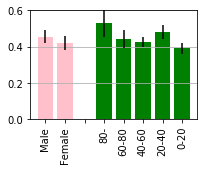

In [9]:
PlotSubgroup('FPR',my_colors=[])

(0.154, 0.18, nan, 0.19, 0.183, 0.203, 0.1, 0.089)


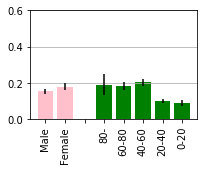

In [10]:
my_colors = ['k','k','white','grey', 'k','k', 'k','k']
PlotSubgroup('FNR',my_colors=[])

## Intersectional identity

In [11]:
FP5_agesex = pd.read_csv("./results11/FPFN_AgeSex.csv")
FP4_agesex= pd.read_csv("./results37/FPFN_AgeSex.csv")
FP3_agesex = pd.read_csv("./results45/FPFN_AgeSex.csv")
FP2_agesex = pd.read_csv("./results62/FPFN_AgeSex.csv")
FP1_agesex = pd.read_csv("./results76/FPFN_AgeSex.csv")
FP_agesex = FP1_agesex.append([FP2_agesex, FP3_agesex,FP4_agesex, FP5_agesex])
FP_AgeSex =FP_agesex.groupby("SexAge")
FP_AgSx_df = FP_AgeSex.describe()

In [12]:
factors = ['FPR_M','FNR_M','FPR_F','FNR_F']
age =['0-20', '20-40', '40-60', '60-80','80-']
AgeSex_df = pd.DataFrame(age, columns=["Age"])
Num_df =  pd.read_csv("./results11/Num_PNF_AgeSex.csv")


def FiveRun(factors,want_df,df,Num):
    for factor in factors:    
        dfM0 = round(df[factor]['mean'],3)
        dfM2 = round(1.96 * df[factor]["std"] / np.sqrt(5),3)
        want_df[factor] = pd.DataFrame(dfM0.values.tolist(),columns =[factor])
        want_df['CI_'+factor] = pd.DataFrame(dfM2.values.tolist(),columns =['CI_'+factor])
    
    return want_df

# Thid Num_F and Num_M is number of patient with actual NF = 0
want = FiveRun(factors,AgeSex_df,FP_AgSx_df,Num_df)
want.to_csv('./results/Inter_FPFN_AgeSex.csv')
want

,Age,FPR_M,CI_FPR_M,FNR_M,CI_FNR_M,FPR_F,CI_FPR_F,FNR_F,CI_FNR_F
0,0-20,0.305,0.034,0.120,0.024,0.771,0.042,0.023,0.011
1,20-40,0.489,0.046,0.108,0.020,0.468,0.035,0.090,0.006
2,40-60,0.482,0.025,0.165,0.011,0.372,0.035,0.246,0.026
3,60-80,0.422,0.050,0.197,0.020,0.464,0.050,0.162,0.026
4,80-,0.561,0.066,0.188,0.039,0.455,0.159,0.200,0.124


Use for FNR: number of patient with actual NF=1 --> We can not count FNR for (M,F: 80-) due to low number of samples 

In [13]:
pd.read_csv("./results11/Num_PNF_AgeSex.csv")

,Unnamed: 0,Age,M,F
0,0,40-60,869,767
1,1,60-80,441,297
2,2,20-40,504,389
3,3,80-,16,5
4,4,0-20,150,70


Use for FPR: number of patient with actual NF=0 --> We can not count FPR for (F: 80- )due to low number of samples 

In [14]:

pd.read_csv("./results11/Num_NNF_AgeSex.csv")

,Unnamed: 0,Age,M,F
0,0,40-60,626,711
1,1,60-80,422,317
2,2,20-40,373,234
3,3,80-,26,11
4,4,0-20,118,27


Largest FPR relates to Female 0-20

Smallest FNR relates to Female 0-20  

In [7]:
118+150+373+504+626+869+422+441+26+16+27+70+234+389+711+767+317+297+11+5

6373

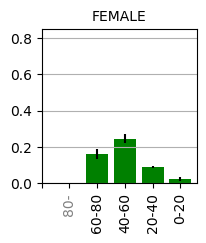

In [15]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2,2))
fontsize = 10

# sex
sex = ('','80-', '60-80', '40-60', '20-40','0-20')
sex_pos = np.arange(len(sex))
FNR =   (np.NAN,np.NAN,
         want.loc[want['Age']=='60-80','FNR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','FNR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','FNR_F'].tolist()[0],
         want.loc[want['Age']=='0-20','FNR_F'].tolist()[0])


error = (np.NAN,np.NAN,
         want.loc[want['Age']=='60-80','CI_FNR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','CI_FNR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','CI_FNR_F'].tolist()[0],
         want.loc[want['Age']=='0-20','CI_FNR_F'].tolist()[0]
        )

color = ['white','green','green','green','green','green']

ax.bar(sex_pos, FNR, yerr=error, align='center',color=color)


labels =['','80-', '60-80', '40-60', '20-40','0-20']
x_pos = np.arange(len(labels))
y_labels = ['0.0', '0.2', '0.4', '0.6','0.8']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom


#ax.set_ylabel('FNR',fontsize = fontsize)
ax.set_title('FEMALE', fontsize = fontsize)
ax.set_ylim(top=0.85)
ax.yaxis.grid(True)

my_colors = ['','grey', 'k','k', 'k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.show()

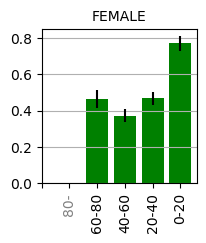

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2,2))
fontsize = 10

# sex
sex = ('','80-', '60-80', '40-60', '20-40','0-20')
sex_pos = np.arange(len(sex))
FPR =   (np.NAN,np.NAN,
         want.loc[want['Age']=='60-80','FPR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','FPR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','FPR_F'].tolist()[0],
         want.loc[want['Age']=='0-20','FPR_F'].tolist()[0])


error = (np.NAN,np.NAN,
         want.loc[want['Age']=='60-80','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='40-60','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='20-40','CI_FPR_F'].tolist()[0],
         want.loc[want['Age']=='0-20','CI_FPR_F'].tolist()[0]
        )

color = ['white','green','green','green','green','green']

ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['','80-', '60-80', '40-60', '20-40','0-20']
x_pos = np.arange(len(labels))
y_labels = ['0.0', '0.2', '0.4', '0.6','0.8']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('FEMALE', fontsize = fontsize)
ax.set_ylim(top=0.85)
ax.yaxis.grid(True)

my_colors = ['','grey', 'k','k', 'k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)


plt.savefig('./FPRFNR/Int_FPR_NF.jpg',bbox_inches='tight')